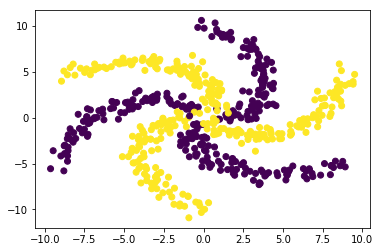

In [95]:
import numpy as np
import matplotlib.pyplot as plt
def get_spiral():
    # Idea: radius -> low...high
    #           (don't start at 0, otherwise points will be "mushed" at origin)
    #       angle = low...high proportional to radius
    #               [0, 2pi/6, 4pi/6, ..., 10pi/6] --> [pi/2, pi/3 + pi/2, ..., ]
    # x = rcos(theta), y = rsin(theta) as usual

    radius = np.linspace(1, 10, 100)
    thetas = np.empty((6, 100))
    for i in range(6):
        start_angle = np.pi*i / 3.0
        end_angle = start_angle + np.pi / 2
        points = np.linspace(start_angle, end_angle, 100)
        thetas[i] = points

    # convert into cartesian coordinates
    x1 = np.empty((6, 100))
    x2 = np.empty((6, 100))
    for i in range(6):
        x1[i] = radius * np.cos(thetas[i])
        x2[i] = radius * np.sin(thetas[i])

    # inputs
    X = np.empty((600, 2))
    X[:,0] = x1.flatten()
    X[:,1] = x2.flatten()

    # add noise
    X += np.random.randn(600, 2)*0.5

    # targets
    Y = np.array([0]*100 + [1]*100 + [0]*100 + [1]*100 + [0]*100 + [1]*100)
    return X, Y

X,y=get_spiral()
plt.scatter(X[:,0],X[:,1],c=y)

In [96]:
import numpy as np
import theano 
from theano import tensor as T
import tensorflow as tf

In [97]:
class HiddenLayer(object):
    def __init__(self,node_list):
        

SyntaxError: unexpected EOF while parsing (<ipython-input-97-89f60da005bc>, line 3)

In [98]:
{'W1':np.random.randn(10,20),}

{'W1': array([[-1.08060647,  0.53927675, -0.29286141, -0.60657642,  0.63869407,
         -0.16714392, -0.27469682,  0.31446744,  0.58019287,  1.32848812,
         -1.5872298 , -0.17274392,  0.09514648, -1.06608753, -0.17799146,
          0.52786452,  0.89245559, -0.26290806, -0.13219414,  1.03971409],
        [-0.71746879,  0.08378028,  0.72628427,  0.20100145, -1.30566951,
          0.35579848, -0.10098823, -0.15292944, -1.10608771, -0.982943  ,
         -2.53729566,  0.60244757, -0.14659835, -0.55110217, -0.2990807 ,
         -0.07949925,  0.21777677, -0.48710394, -0.68746252, -1.07152047],
        [-1.49946193, -1.51546468, -0.48381229, -0.96872094,  1.05821744,
         -0.57132758,  0.4555983 ,  1.15750242, -1.35382917,  0.98347512,
         -0.22591787, -0.48907757,  0.40499139,  0.11192084, -0.42466086,
          1.30469256,  1.6147473 ,  1.30300398, -0.23384522,  0.32322341],
        [ 1.10540132, -0.24781177,  1.19830874,  1.55983151, -0.69658207,
         -0.73142093, -0.4806

In [100]:
D=2
K=2

In [101]:
layers=[2,2,3,4,8,2]

In [102]:
weights={}
biases={}
for i in range(len(layers)):
    w='W'+str(i)
    if i==0:
        M1=D
        M2=layers[i]
    elif i==(len(layers)-1):
        M2=K
        M1=layers[i]
    else:
        M1=layers[i]
        M2=layers[i+1]
    weights[w]=theano.shared(np.random.randn(M1,M2)/np.sqrt(M1),'W'+str(i))
    biases['b'+str(i)]=theano.shared(np.random.randn(M2),'b'+str(i))    

In [103]:
weights['W0'].get_value()

array([[ 0.46182309, -0.55643751],
       [ 0.48783645, -0.04289441]])

In [104]:
thX=T.matrix('X')
thY=T.matrix('y')

In [105]:
def forward(X,weights,biases):
    for i in range(len(weights)):
        if i==0:
            z=T.nnet.sigmoid(X.dot(weights['W'+str(i)]+biases['b'+str(i)]))
        elif i == (len(weights)-1):
            z=T.nnet.softmax(z.dot(weights['W'+str(i)]+biases['b'+str(i)]))
        else:
            z=T.nnet.relu(z.dot(weights['W'+str(i)]+biases['b'+str(i)]))
    return z

In [106]:
y_p=forward(thX,weights,biases)

In [107]:
cost=-(thY*T.log(y_p)).sum()

In [108]:
grads={}
for i in range(len(weights)):
    grads['W'+str(i)]=T.grad(cost,weights['W'+str(i)])
    grads['b'+str(i)]=T.grad(cost,biases['b'+str(i)])    

In [109]:
lr=0.01

In [110]:
w_up={}
for i in range(len(weights)):
    w_up['W'+str(i)]=weights['W'+str(i)]-lr*grads['W'+str(i)]
b_up={}
for i in range(len(weights)):
    b_up['b'+str(i)]=biases['b'+str(i)]-lr*grads['b'+str(i)]

In [118]:
updates=[]
for i in range(len(weights)):
    updates.append((weights['W'+str(i)],w_up['W'+str(i)]))
    updates.append((biases['b'+str(i)],b_up['b'+str(i)]))

In [119]:
updates

[(W0, Elemwise{sub,no_inplace}.0),
 (b0, Elemwise{sub,no_inplace}.0),
 (W1, Elemwise{sub,no_inplace}.0),
 (b1, Elemwise{sub,no_inplace}.0),
 (W2, Elemwise{sub,no_inplace}.0),
 (b2, Elemwise{sub,no_inplace}.0),
 (W3, Elemwise{sub,no_inplace}.0),
 (b3, Elemwise{sub,no_inplace}.0),
 (W4, Elemwise{sub,no_inplace}.0),
 (b4, Elemwise{sub,no_inplace}.0),
 (W5, Elemwise{sub,no_inplace}.0),
 (b5, Elemwise{sub,no_inplace}.0)]

In [112]:
train=theano.function(inputs=[thX,thY],updates=updates)

In [113]:
preds=T.argmax(y_p,axis=1)

In [114]:
def one_hot_encoder(X):
    N=X.shape[0]
    K=len(np.unique(X))
    Z=np.zeros((N,K))
    for i in range(N):
        c=X[i]
        Z[i,c]=1
    return Z
y_i=one_hot_encoder(y)

In [115]:
y_i.shape

(600, 2)

In [116]:
get_preds=theano.function(inputs=[thX,thY],outputs=[cost,preds])

In [117]:
for i in range(1000):
    train(X,y_i)
    c,p=get_preds(X,y_i)
    print('Epoch {0} cost {1} class {2}'.format(i,c,np.mean(y==p)))

Epoch 0 cost 415.88830833596813 class 0.5
Epoch 1 cost 415.88830833596813 class 0.5
Epoch 2 cost 415.88830833596813 class 0.5
Epoch 3 cost 415.88830833596813 class 0.5
Epoch 4 cost 415.88830833596813 class 0.5
Epoch 5 cost 415.88830833596813 class 0.5
Epoch 6 cost 415.88830833596813 class 0.5
Epoch 7 cost 415.88830833596813 class 0.5
Epoch 8 cost 415.88830833596813 class 0.5
Epoch 9 cost 415.88830833596813 class 0.5
Epoch 10 cost 415.88830833596813 class 0.5
Epoch 11 cost 415.88830833596813 class 0.5
Epoch 12 cost 415.88830833596813 class 0.5
Epoch 13 cost 415.88830833596813 class 0.5
Epoch 14 cost 415.88830833596813 class 0.5
Epoch 15 cost 415.88830833596813 class 0.5
Epoch 16 cost 415.88830833596813 class 0.5
Epoch 17 cost 415.88830833596813 class 0.5
Epoch 18 cost 415.88830833596813 class 0.5
Epoch 19 cost 415.88830833596813 class 0.5
Epoch 20 cost 415.88830833596813 class 0.5
Epoch 21 cost 415.88830833596813 class 0.5
Epoch 22 cost 415.88830833596813 class 0.5
Epoch 23 cost 415.888

Epoch 206 cost 415.88830833596813 class 0.5
Epoch 207 cost 415.88830833596813 class 0.5
Epoch 208 cost 415.88830833596813 class 0.5
Epoch 209 cost 415.88830833596813 class 0.5
Epoch 210 cost 415.88830833596813 class 0.5
Epoch 211 cost 415.88830833596813 class 0.5
Epoch 212 cost 415.88830833596813 class 0.5
Epoch 213 cost 415.88830833596813 class 0.5
Epoch 214 cost 415.88830833596813 class 0.5
Epoch 215 cost 415.88830833596813 class 0.5
Epoch 216 cost 415.88830833596813 class 0.5
Epoch 217 cost 415.88830833596813 class 0.5
Epoch 218 cost 415.88830833596813 class 0.5
Epoch 219 cost 415.88830833596813 class 0.5
Epoch 220 cost 415.88830833596813 class 0.5
Epoch 221 cost 415.88830833596813 class 0.5
Epoch 222 cost 415.88830833596813 class 0.5
Epoch 223 cost 415.88830833596813 class 0.5
Epoch 224 cost 415.88830833596813 class 0.5
Epoch 225 cost 415.88830833596813 class 0.5
Epoch 226 cost 415.88830833596813 class 0.5
Epoch 227 cost 415.88830833596813 class 0.5
Epoch 228 cost 415.8883083359681

Epoch 408 cost 415.88830833596813 class 0.5
Epoch 409 cost 415.88830833596813 class 0.5
Epoch 410 cost 415.88830833596813 class 0.5
Epoch 411 cost 415.88830833596813 class 0.5
Epoch 412 cost 415.88830833596813 class 0.5
Epoch 413 cost 415.88830833596813 class 0.5
Epoch 414 cost 415.88830833596813 class 0.5
Epoch 415 cost 415.88830833596813 class 0.5
Epoch 416 cost 415.88830833596813 class 0.5
Epoch 417 cost 415.88830833596813 class 0.5
Epoch 418 cost 415.88830833596813 class 0.5
Epoch 419 cost 415.88830833596813 class 0.5
Epoch 420 cost 415.88830833596813 class 0.5
Epoch 421 cost 415.88830833596813 class 0.5
Epoch 422 cost 415.88830833596813 class 0.5
Epoch 423 cost 415.88830833596813 class 0.5
Epoch 424 cost 415.88830833596813 class 0.5
Epoch 425 cost 415.88830833596813 class 0.5
Epoch 426 cost 415.88830833596813 class 0.5
Epoch 427 cost 415.88830833596813 class 0.5
Epoch 428 cost 415.88830833596813 class 0.5
Epoch 429 cost 415.88830833596813 class 0.5
Epoch 430 cost 415.8883083359681

Epoch 730 cost 415.88830833596813 class 0.5
Epoch 731 cost 415.88830833596813 class 0.5
Epoch 732 cost 415.88830833596813 class 0.5
Epoch 733 cost 415.88830833596813 class 0.5
Epoch 734 cost 415.88830833596813 class 0.5
Epoch 735 cost 415.88830833596813 class 0.5
Epoch 736 cost 415.88830833596813 class 0.5
Epoch 737 cost 415.88830833596813 class 0.5
Epoch 738 cost 415.88830833596813 class 0.5
Epoch 739 cost 415.88830833596813 class 0.5
Epoch 740 cost 415.88830833596813 class 0.5
Epoch 741 cost 415.88830833596813 class 0.5
Epoch 742 cost 415.88830833596813 class 0.5
Epoch 743 cost 415.88830833596813 class 0.5
Epoch 744 cost 415.88830833596813 class 0.5
Epoch 745 cost 415.88830833596813 class 0.5
Epoch 746 cost 415.88830833596813 class 0.5
Epoch 747 cost 415.88830833596813 class 0.5
Epoch 748 cost 415.88830833596813 class 0.5
Epoch 749 cost 415.88830833596813 class 0.5
Epoch 750 cost 415.88830833596813 class 0.5
Epoch 751 cost 415.88830833596813 class 0.5
Epoch 752 cost 415.8883083359681

Epoch 946 cost 415.88830833596813 class 0.5
Epoch 947 cost 415.88830833596813 class 0.5
Epoch 948 cost 415.88830833596813 class 0.5
Epoch 949 cost 415.88830833596813 class 0.5
Epoch 950 cost 415.88830833596813 class 0.5
Epoch 951 cost 415.88830833596813 class 0.5
Epoch 952 cost 415.88830833596813 class 0.5
Epoch 953 cost 415.88830833596813 class 0.5
Epoch 954 cost 415.88830833596813 class 0.5
Epoch 955 cost 415.88830833596813 class 0.5
Epoch 956 cost 415.88830833596813 class 0.5
Epoch 957 cost 415.88830833596813 class 0.5
Epoch 958 cost 415.88830833596813 class 0.5
Epoch 959 cost 415.88830833596813 class 0.5
Epoch 960 cost 415.88830833596813 class 0.5
Epoch 961 cost 415.88830833596813 class 0.5
Epoch 962 cost 415.88830833596813 class 0.5
Epoch 963 cost 415.88830833596813 class 0.5
Epoch 964 cost 415.88830833596813 class 0.5
Epoch 965 cost 415.88830833596813 class 0.5
Epoch 966 cost 415.88830833596813 class 0.5
Epoch 967 cost 415.88830833596813 class 0.5
Epoch 968 cost 415.8883083359681